In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#reading the dataset
dataset=pd.read_csv("Boom Bike.csv")

In [4]:
dataset.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dataset.shape

(730, 16)

In [6]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# assigning string values to different seasons instead of numeric values
# 1 = spring
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'

# 2 = summer
dataset.loc[(dataset['season'] == 2), 'season'] = 'summer'

# 3 = fall
dataset.loc[(dataset['season'] == 3), 'season'] = 'fall'

# 4 = winter
dataset.loc[(dataset['season'] == 4), 'season'] = 'winter'

In [10]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
# 0 = 2018 ,1 =2019 : year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [12]:
# assigning string values to different months instead of numeric values
def object_map_mnths(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4: 'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
dataset[['mnth']]=dataset[['mnth']].apply(object_map_mnths)

In [14]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [16]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [17]:
def str_map_weekday(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

In [18]:
dataset[['weekday']]=dataset[['weekday']].apply(str_map_weekday)

In [19]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: count, dtype: int64

In [20]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [21]:
# 1 = Clear,few clouds,Partly Cloudly
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'

# 2 = Mist, Cloudly
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'

# 3 = Light Snow,Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'


In [22]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [23]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

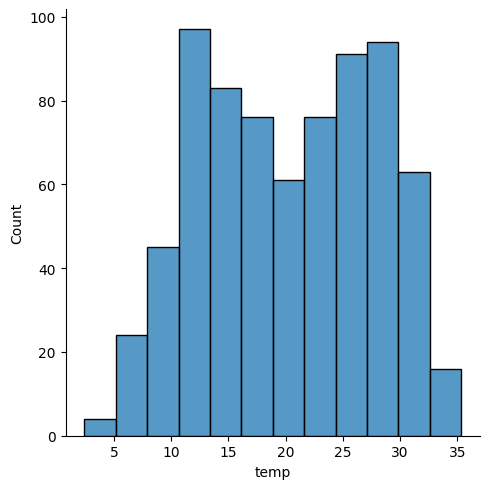

In [24]:
#temperature
sns.displot(dataset['temp'])

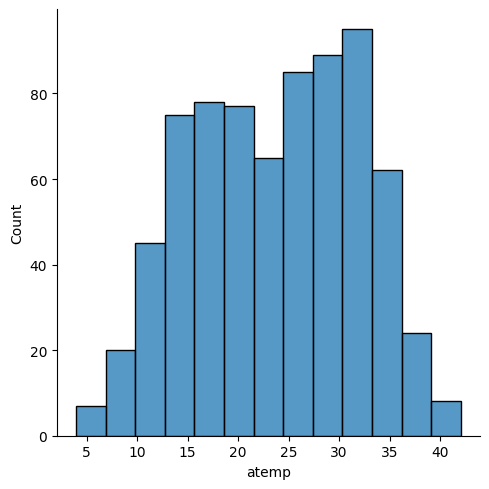

In [25]:
#actual temperature
sns.displot(dataset['atemp'])
plt.show()

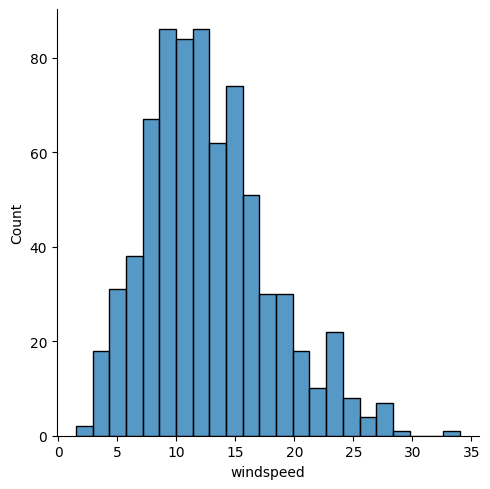

In [26]:
#wind speed
sns.displot(dataset['windspeed'])
plt.show()

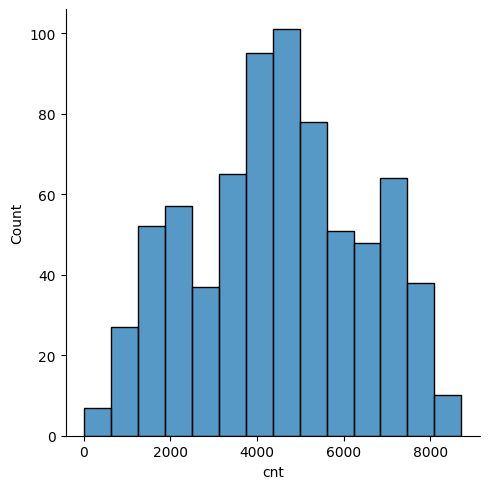

In [27]:
# target variable: count of total rental bikes includes both casual and registered
sns.displot(dataset['cnt'])
plt.show()

In [28]:
# converting date to datetime format
dataset['dteday']=dataset['dteday'].astype('datetime64[ns]')

In [29]:
dataset_categorical=dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [30]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [31]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


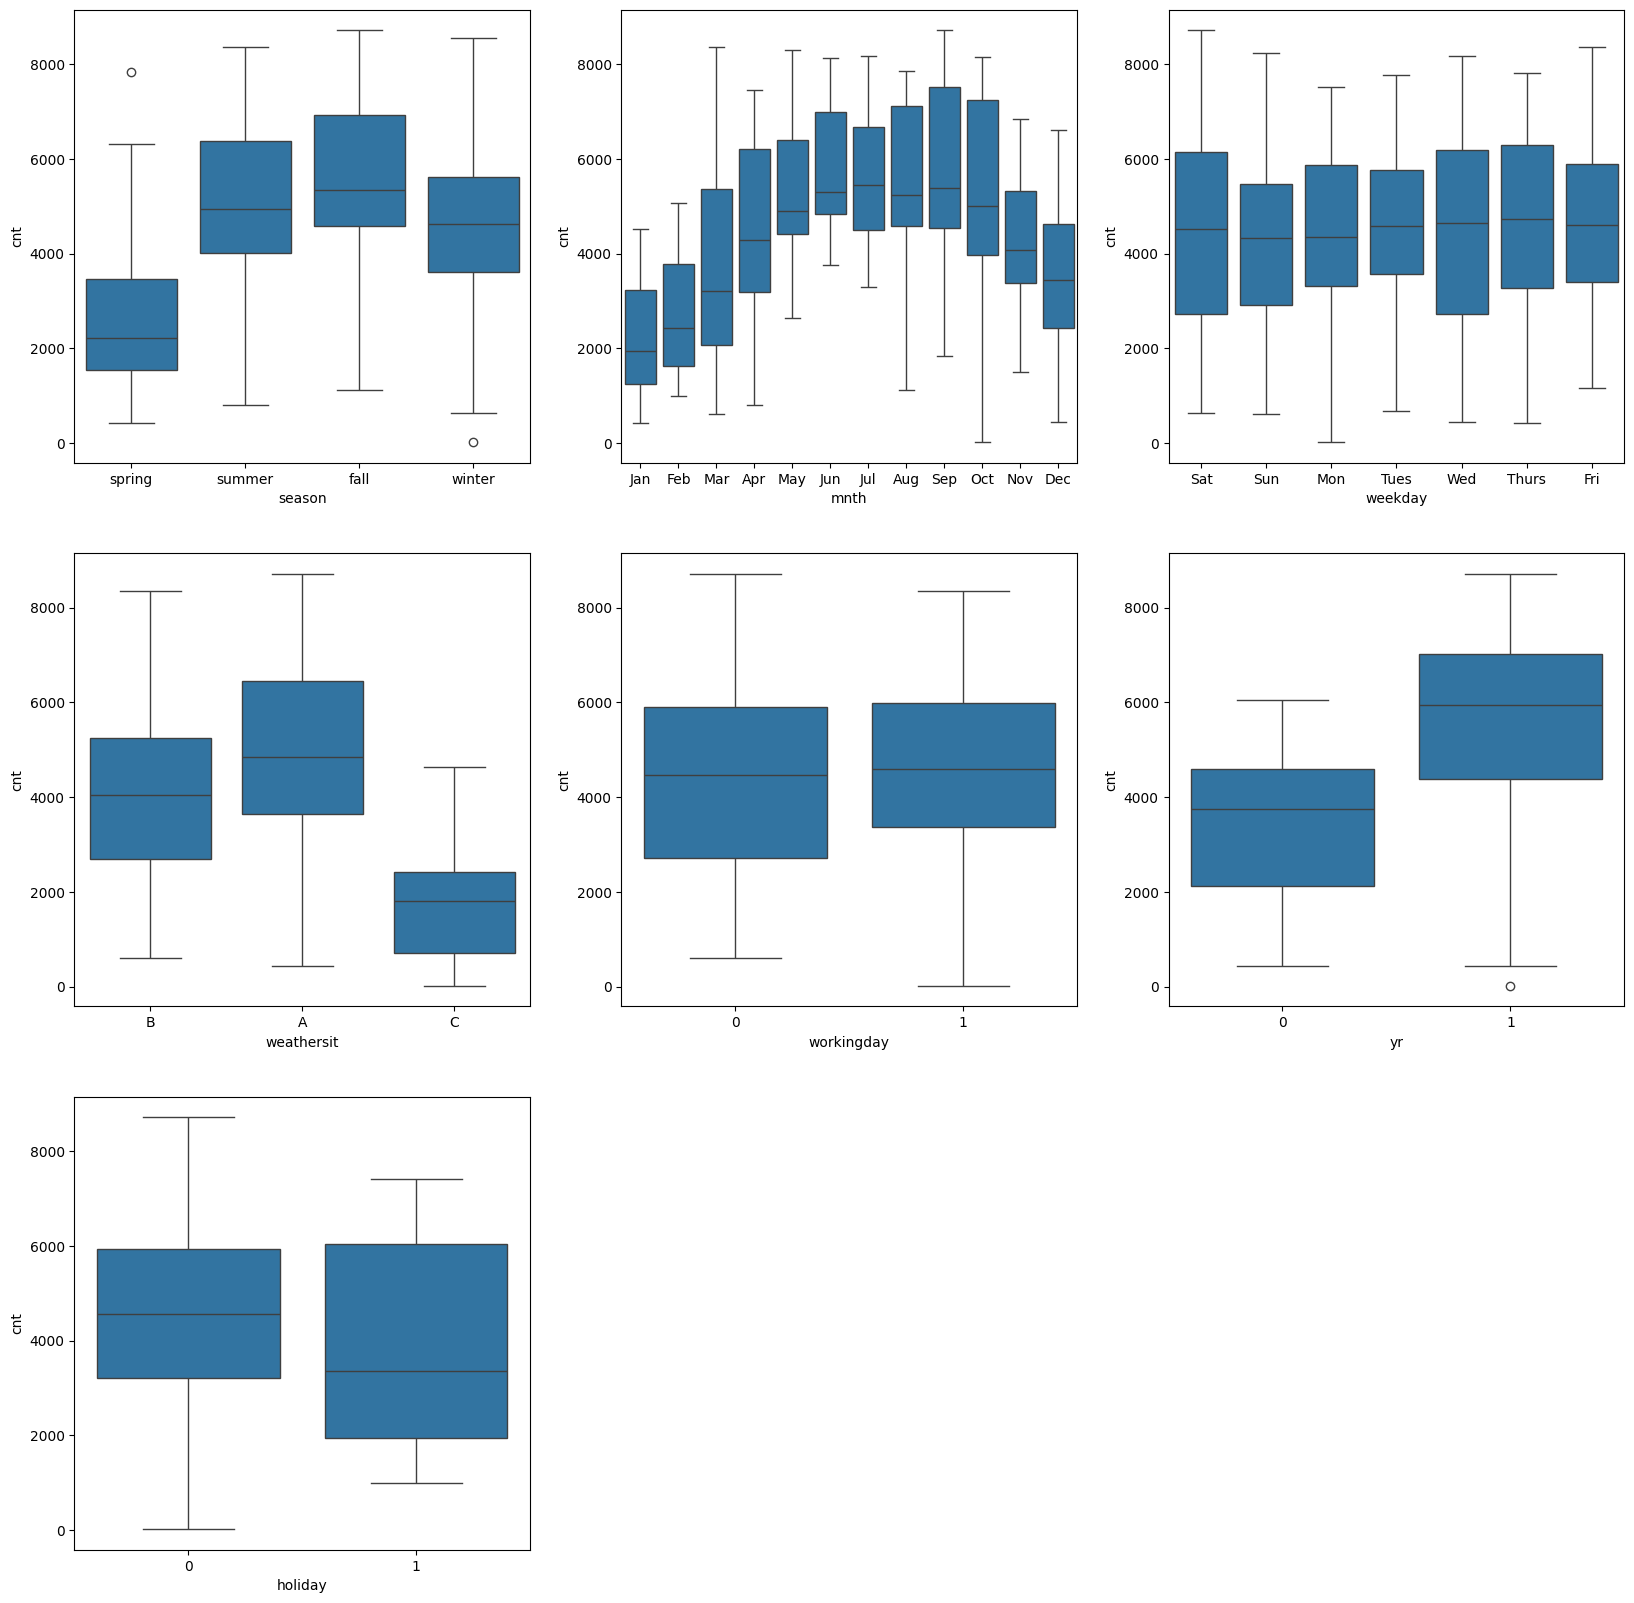

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()

In [33]:
intvarlist=["casual","registered","cnt"]

for var in intvarlist:
    dataset[var]=dataset[var].astype("float")

In [34]:
dataset_numeric=dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


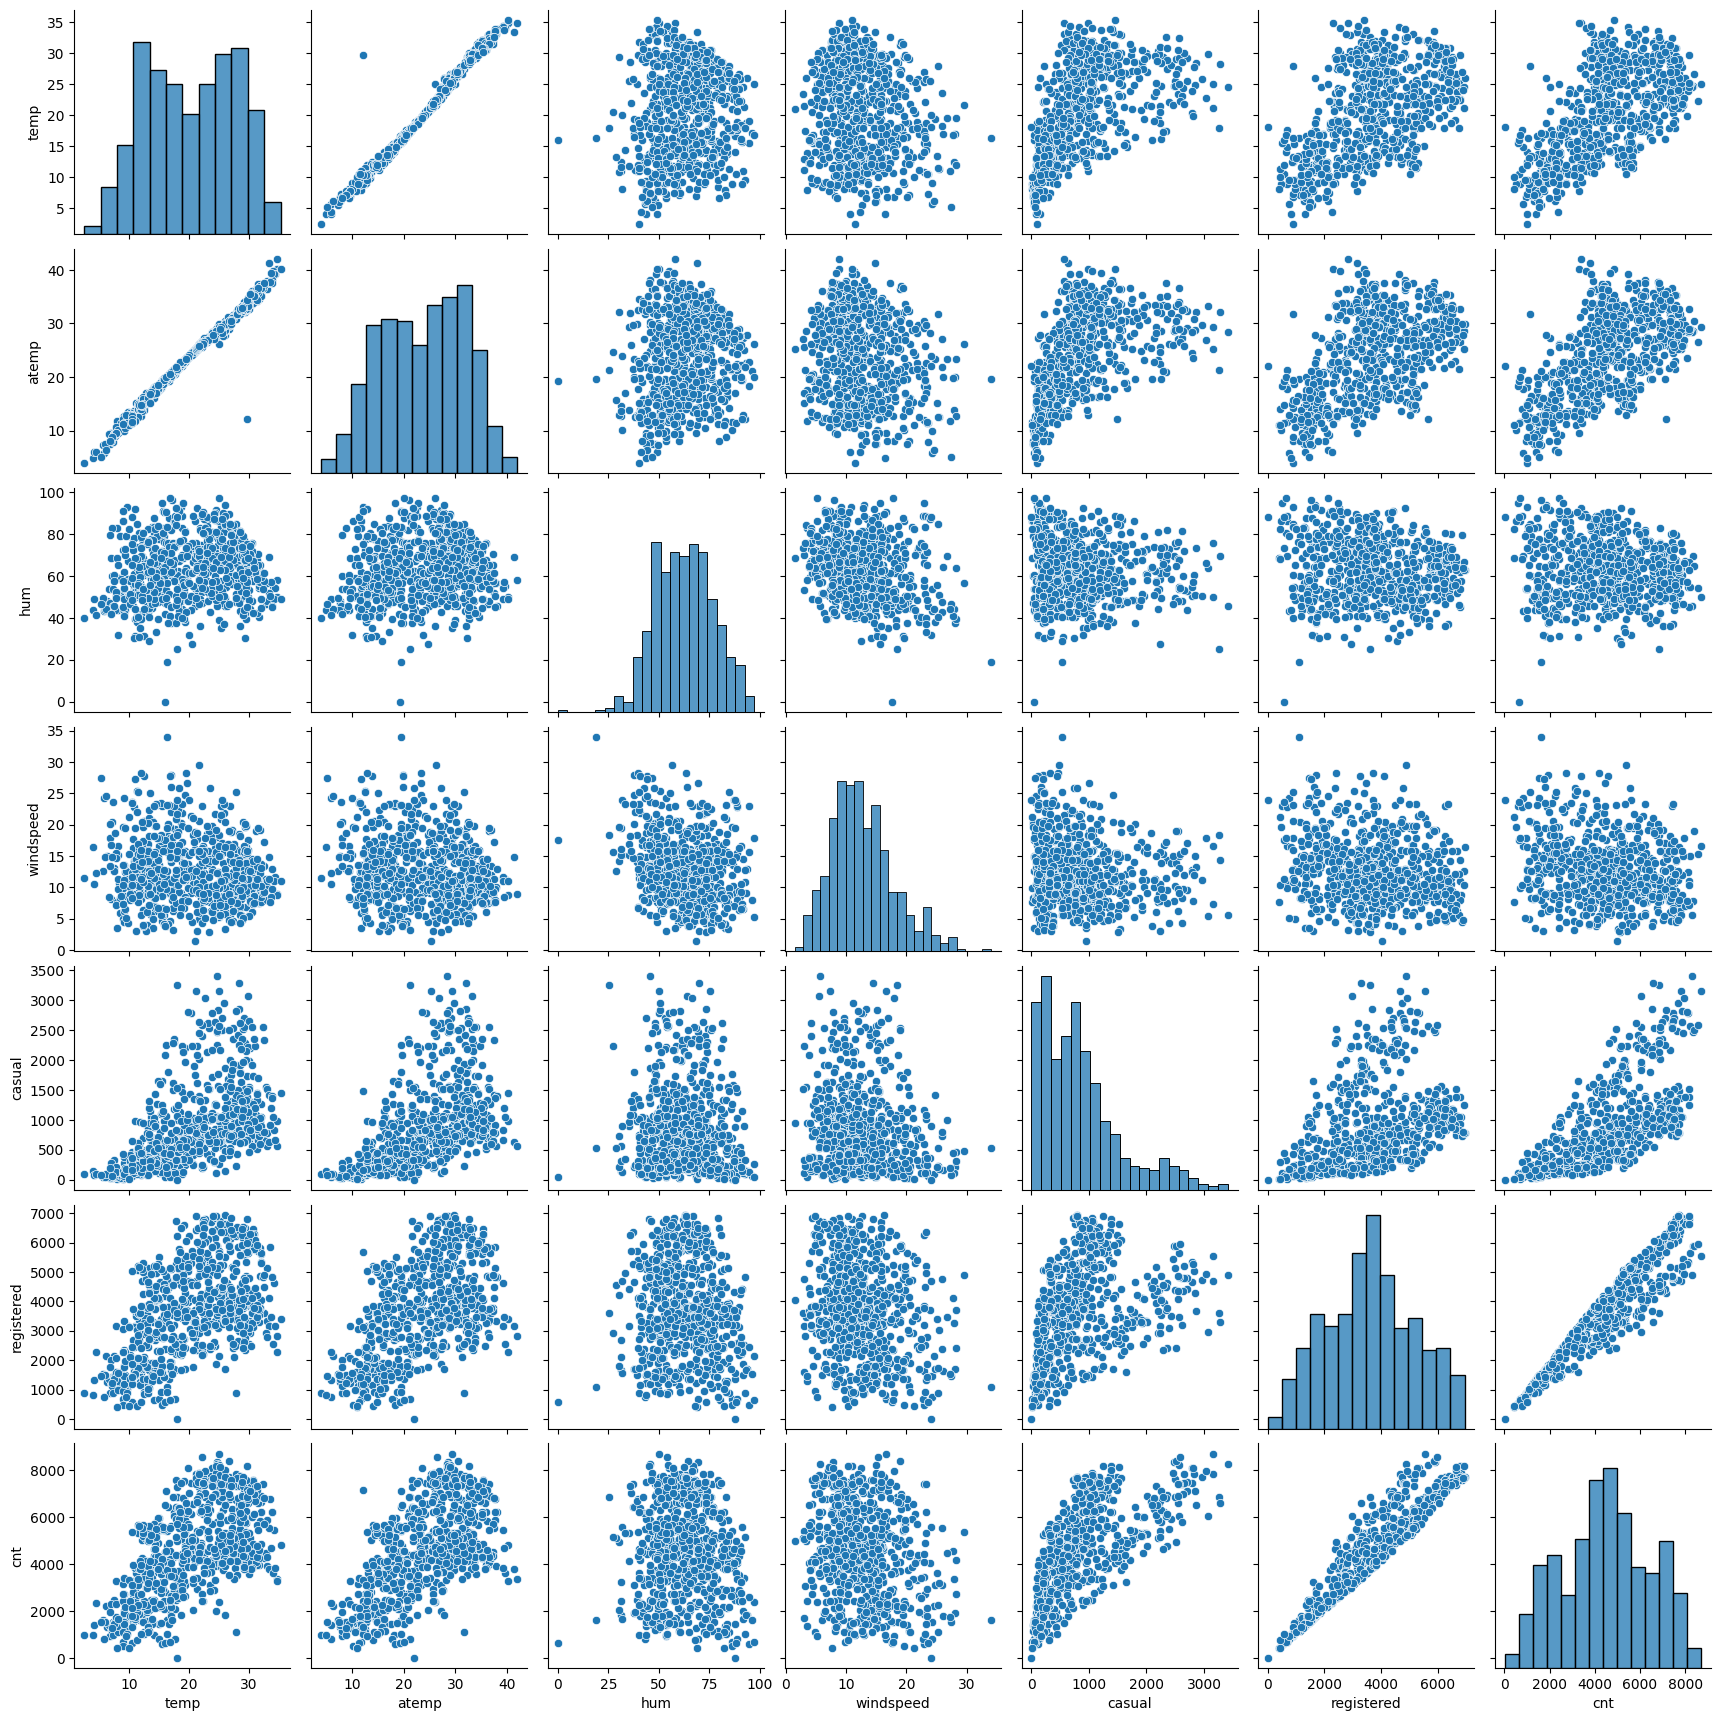

In [35]:
sns.pairplot(dataset_numeric)
plt.show()

In [36]:
cor=dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

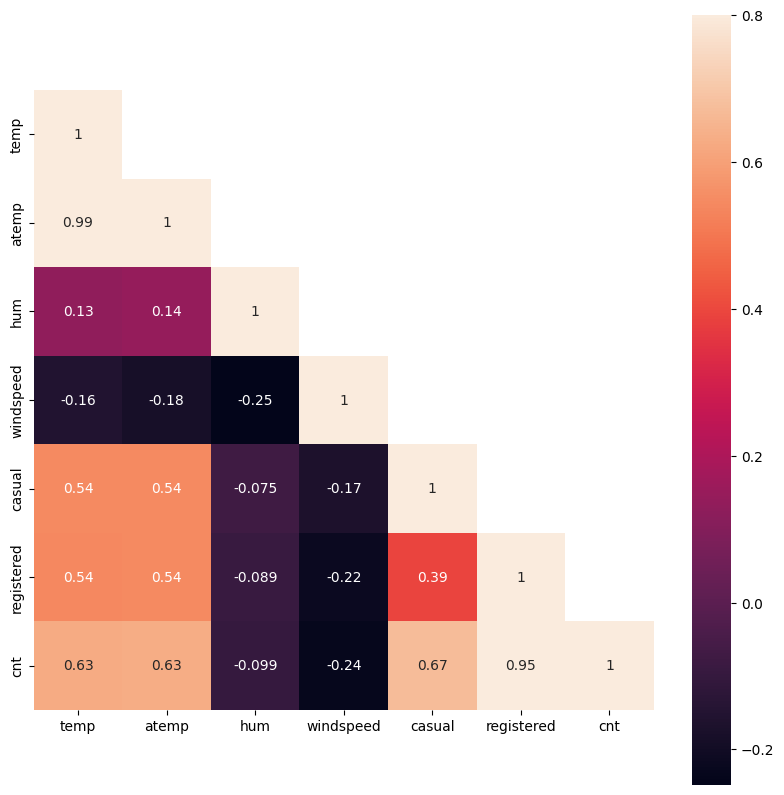

In [37]:
# heatmap
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=0.8,square=True,annot=True)

In [38]:
# removing atemp as it is highly corealed with temp
dataset.drop('atemp',axis=1,inplace=True)

In [39]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tues,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [40]:
dataset_categorical=dataset.select_dtypes(include=['object'])

In [41]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tues,A
4,spring,Jan,Wed,A


In [42]:
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [43]:
# drop categorical variable columns
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [44]:
# concatenate dummy variables with the dataset
dataset=pd.concat([dataset,dataset_dummies],axis=1)

In [45]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,False


In [46]:
dataset=dataset.drop(['instant','dteday'],axis=1,inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


In [47]:
# import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [48]:
# split the dataframe into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [49]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,False,True,False,False,False,False,False,True,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,False,True,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,True,False,False
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,True,False,False,False,False,True,False


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [52]:
# apply scalar to all columns except dummy variables
var = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]
df_train[var] = scaler.fit_transform(df_train[var])

In [53]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


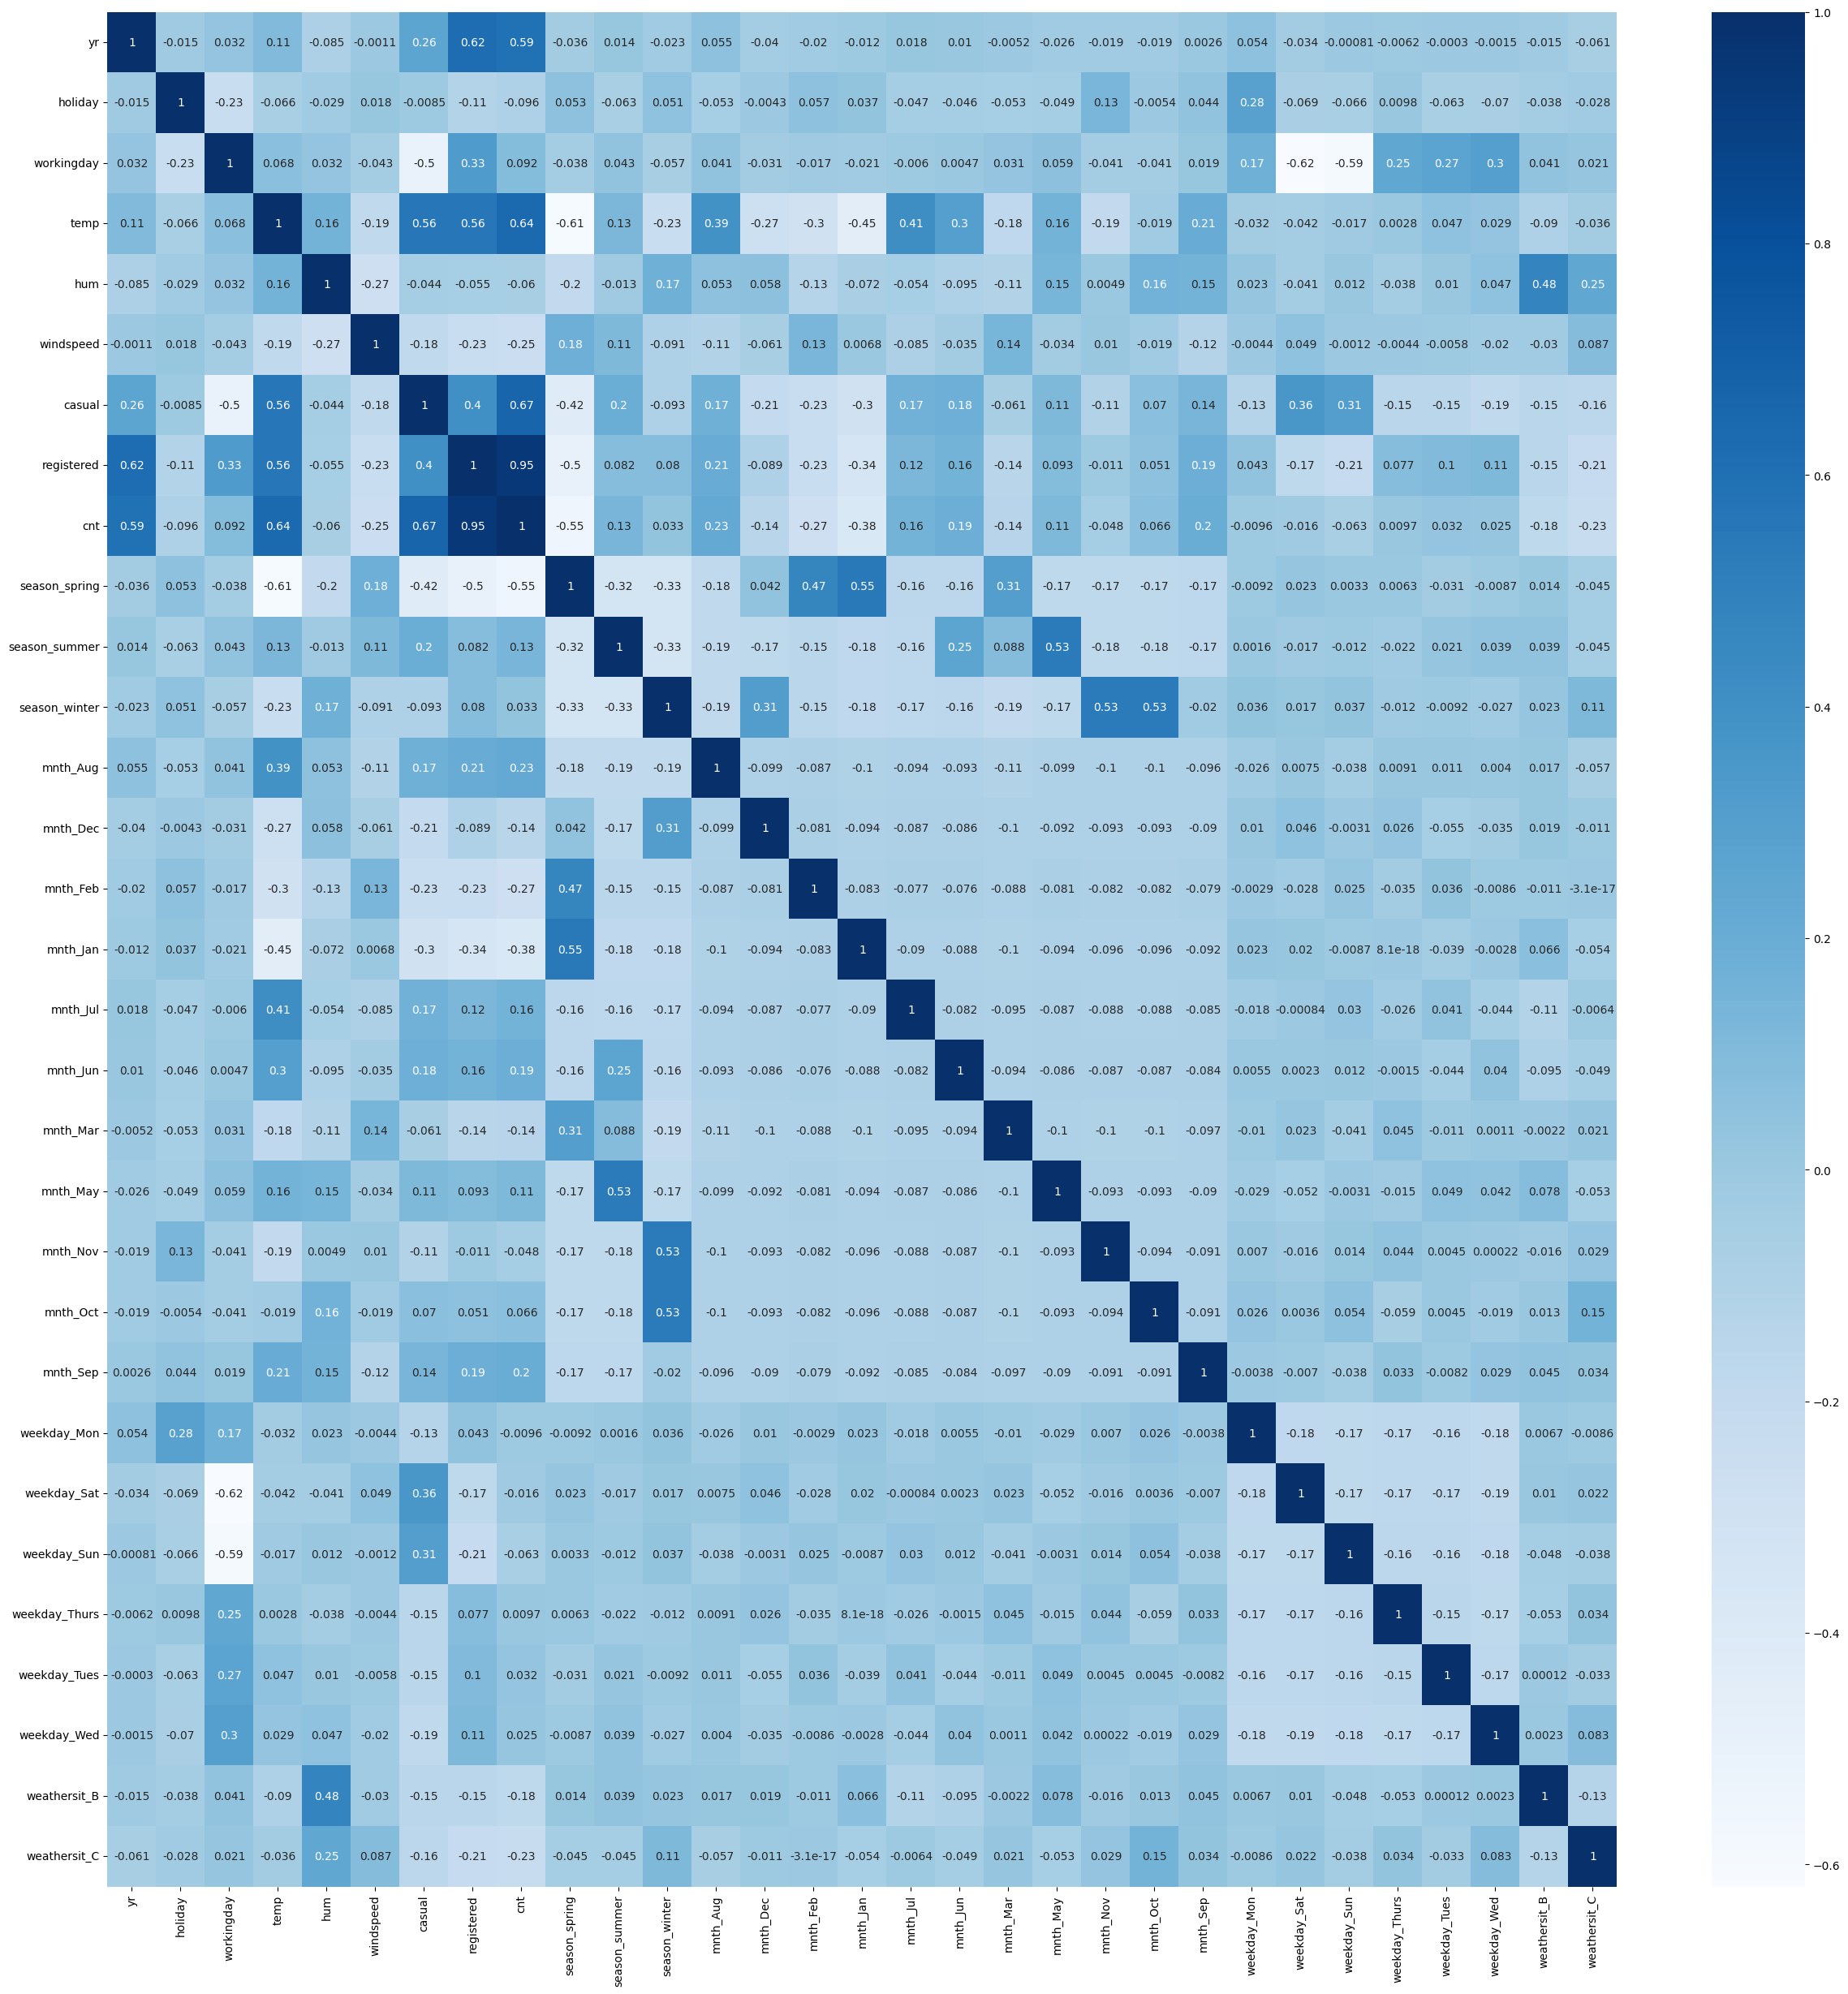

In [54]:
# checking the correlation coefficients to see which variables are highly corelated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="Blues")
plt.show()

In [55]:
# diving into X and Y
x_train=df_train.drop(["casual","registered"],axis=1)
y_train=df_train.pop('cnt')

In [56]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [57]:
np.array(x_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, True, False],
       ...,
       [0, 0, 1, ..., True, False, False],
       [0, 0, 0, ..., False, True, False],
       [0, 0, 1, ..., False, True, False]], dtype=object)

In [58]:
import statsmodels.api as sm

In [59]:
x_train=x_train.astype(float)
y_train=y_train.astype(float)
x_train_lm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_lm).fit()

In [60]:
lr.params

const            8.771196e-17
yr               6.526897e-16
holiday         -1.413800e-15
workingday      -1.009392e-16
temp            -2.441623e-16
hum              6.782769e-16
windspeed        8.413409e-16
cnt              1.000000e+00
season_spring   -6.036838e-16
season_summer   -4.924717e-16
season_winter   -3.027092e-16
mnth_Aug         3.462942e-16
mnth_Dec         4.388850e-16
mnth_Feb         4.163336e-16
mnth_Jan         0.000000e+00
mnth_Jul         6.049848e-16
mnth_Jun         5.784219e-16
mnth_Mar         2.445960e-16
mnth_May         8.857932e-16
mnth_Nov         3.087808e-16
mnth_Oct         2.849283e-16
mnth_Sep         4.588344e-16
weekday_Mon      1.007441e-15
weekday_Sat      3.981190e-16
weekday_Sun      4.180413e-16
weekday_Thurs    6.831016e-16
weekday_Tues     5.977207e-16
weekday_Wed      5.656283e-16
weathersit_B     3.165870e-17
weathersit_C     2.857957e-16
dtype: float64

In [61]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
print(lm.coef_)
print(lm.intercept_)

[ 5.45759819e-16  9.95026749e-03  9.95026749e-03  1.30172564e-15
 -4.28598859e-16 -3.45764194e-16  1.00000000e+00  2.04390297e-16
  3.06874800e-17 -1.87518619e-17  2.72511378e-16  2.23128791e-17
  9.32124395e-17  1.45427702e-16  8.50265778e-17 -1.36233101e-16
 -3.05139444e-17 -1.73472348e-16 -1.04083409e-16 -1.11022302e-16
  1.91686944e-16 -2.77555756e-17  9.95026749e-03  9.95026749e-03
 -9.36750677e-17 -5.17164436e-17 -6.59194921e-17 -5.55111512e-17
  1.11022302e-16]
-0.009950267486487974


In [63]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.710e+29
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:01:00   Log-Likelihood:                 16893.
No. Observations:                 510   AIC:                        -3.373e+04
Df Residuals:                     481   BIC:                        -3.361e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.771e-17   4.29e-16      0.204      0.838   -7.55e-16    9.31e-16
yr             6.527e-16   1.54e-16      4.231      0.000     3.5e-16    9.56e-16
holiday       -1.414e-15   2.79e-16     -5.074      0.000   -1.96e-15   -8.66e-16
workingday    -1.009e-16   1.51e-16     -0.668      0.505   -3.98e-16    1.96e-16
temp          -2.442e-16   5.88e-16     -0.415      0.678    -1.4e-15    9.11e-16
hum            6.783e-16   4.54e-16      1.495      0.136   -2.13e-16    1.57e-15
windspeed      8.413e-16   3.14e-16      2.679      0.008    2.24e-16    1.46e-15
cnt               1.0000   5.29e-16   1.89e+15      0.000       1.000       1.000
season_spring -6.037e-16   3.49e-16     -1.731      0.084   -1.29e-15    8.16e-17
season_summer -4.925e-16   3.05e-16     -1.616      0.107   -1.09e-15    1.06e-16
season_winter -3.027e-16   3.29e-16     -0.921      0.357   -9.48e-16    3.43e-16
mnth_Aug       3.463e-16   3.91e-16      0.886      0.376   -4.22e-16    1.11e-15
mnth_Dec       4.389e-16    3.9e-16      1.124      0.262   -3.28e-16    1.21e-15
mnth_Feb       4.163e-16   3.82e-16      1.090      0.276   -3.34e-16    1.17e-15
mnth_Jan               0   3.91e-16          0      1.000   -7.67e-16    7.67e-16
mnth_Jul        6.05e-16   4.07e-16      1.485      0.138   -1.96e-16    1.41e-15
mnth_Jun       5.784e-16   2.91e-16      1.987      0.047    6.52e-18    1.15e-15
mnth_Mar       2.446e-16   2.85e-16      0.859      0.391   -3.15e-16    8.04e-16
mnth_May       8.858e-16   2.44e-16      3.629      0.000    4.06e-16    1.37e-15
mnth_Nov       3.088e-16   4.22e-16      0.731      0.465   -5.21e-16    1.14e-15
mnth_Oct       2.849e-16   4.15e-16      0.686      0.493   -5.31e-16     1.1e-15
mnth_Sep       4.588e-16   3.74e-16      1.227      0.220   -2.76e-16    1.19e-15
weekday_Mon    1.007e-15   1.78e-16      5.659      0.000    6.58e-16    1.36e-15
weekday_Sat    3.981e-16   1.67e-16      2.382      0.018    6.97e-17    7.27e-16
weekday_Sun     4.18e-16   1.63e-16      2.563      0.011    9.76e-17    7.39e-16
weekday_Thurs  6.831e-16    1.8e-16      3.793      0.000    3.29e-16    1.04e-15
weekday_Tues   5.977e-16    1.8e-16      3.319      0.001    2.44e-16    9.52e-16
weekday_Wed    5.656e-16   1.73e-16      3.272      0.001    2.26e-16    9.05e-16
weathersit_B   3.166e-17   1.25e-16      0.253      0.801   -2.15e-16    2.78e-16
weathersit_C   2.858e-16   3.35e-16      0.854      0.393   -3.72e-16    9.43e-16
==============================================================================
Omnibus:                        9.416   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.665
Skew:                          -0.025   Prob(JB):                     0.000397
Kurtosis:                       3.857   Cond. No.            

In [64]:
# import rfe
from sklearn.feature_selection import RFE

In [65]:
lm=LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# fit with 15 feature
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[False  True  True  True  True  True  True False  True False  True  True
  True False  True False  True False False False False False  True  True
 False False False False  True]
[ 3  1  1  1  1  1  1  9  1 15  1  1  1 11  1  2  1 10  6 13  5 12  1  1
 14  7  8  4  1]


In [66]:
col1=x_train.columns[rfe1.support_]

In [67]:
col1

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul',
       'mnth_Mar', 'weekday_Sat', 'weekday_Sun', 'weathersit_C'],
      dtype='object')

In [68]:
x_train_rfe1=x_train[col1]

x_train_rfe1=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.463e+30
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:01:00   Log-Likelihood:                 17220.
No. Observations:                 510   AIC:                        -3.441e+04
Df Residuals:                     495   BIC:                        -3.435e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.108e-16   1.35e-16      1.560      0.119   -5.47e-17    4.76e-16
holiday        4.183e-16   1.24e-16      3.384      0.001    1.75e-16    6.61e-16
workingday     4.012e-17   5.54e-17      0.724      0.470   -6.88e-17    1.49e-16
temp          -3.095e-16    1.9e-16     -1.629      0.104   -6.83e-16    6.37e-17
hum           -7.624e-16   1.86e-16     -4.089      0.000   -1.13e-15   -3.96e-16
windspeed     -5.725e-17   1.54e-16     -0.371      0.711   -3.61e-16    2.46e-16
cnt               1.0000   1.54e-16   6.48e+15      0.000       1.000       1.000
season_summer -9.237e-17   6.31e-17     -1.464      0.144   -2.16e-16    3.16e-17
mnth_Aug      -1.227e-16   9.91e-17     -1.239      0.216   -3.17e-16    7.19e-17
mnth_Dec       1.735e-17    9.3e-17      0.186      0.852   -1.65e-16       2e-16
mnth_Feb       -7.24e-17   1.05e-16     -0.691      0.490   -2.78e-16    1.33e-16
mnth_Jul      -2.797e-16   1.14e-16     -2.463      0.014   -5.03e-16   -5.66e-17
mnth_Mar       3.773e-16   8.43e-17      4.476      0.000    2.12e-16    5.43e-16
weekday_Sat    6.757e-16    6.8e-17      9.930      0.000    5.42e-16    8.09e-16
weekday_Sun   -8.184e-16   6.88e-17    -11.898      0.000   -9.53e-16   -6.83e-16
weathersit_C   8.674e-18    1.5e-16      0.058      0.954   -2.86e-16    3.04e-16
==============================================================================
Omnibus:                       12.167   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.349
Skew:                           0.365   Prob(JB):                      0.00208
Kurtosis:                       3.216   Cond. No.                     6.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
a = x_train_rfe1.drop('const', axis=1)

In [71]:
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,features,VIF
1,workingday,34.89
12,weekday_Sat,8.60
13,weekday_Sun,7.99
2,temp,3.30
5,cnt,2.16
0,holiday,2.13
10,mnth_Jul,1.64
7,mnth_Aug,1.53
3,hum,1.33
6,season_summer,1.32


In [72]:
lm=LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)

# fit with  feature
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False False  True False False False  True False False False False False
  True False  True False  True False False False False False False  True
 False False False False  True]
[11  2  1  5  6  9  1 17  8 23  3  4  1 19  1 10  1 18 14 21 13 20  7  1
 22 15 16 12  1]


In [73]:
col2=x_train.columns[rfe2.support_]

x_train_rfe2=x_train[col2]

x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.200e+30
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:01:00   Log-Likelihood:                 16610.
No. Observations:                 510   AIC:                        -3.320e+04
Df Residuals:                     502   BIC:                        -3.317e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.203e-15   2.71e-16     -4.431      0.000   -1.74e-15    -6.7e-16
workingday   -3.777e-16   2.06e-16     -1.836      0.067   -7.82e-16    2.64e-17
cnt              1.0000    3.8e-16   2.63e+15      0.000       1.000       1.000
mnth_Feb      9.541e-17   3.26e-16      0.292      0.770   -5.46e-16    7.36e-16
mnth_Jul     -2.925e-17   2.96e-16     -0.099      0.921   -6.12e-16    5.53e-16
mnth_Mar      5.898e-17   2.66e-16      0.221      0.825   -4.64e-16    5.82e-16
weekday_Sun  -4.684e-17   2.74e-16     -0.171      0.865   -5.86e-16    4.92e-16
weathersit_C -3.816e-17   4.72e-16     -0.081      0.936   -9.66e-16     8.9e-16
==============================================================================
Omnibus:                       36.357   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.601
Skew:                          -0.594   Prob(JB):                     1.86e-08
Kurtosis:                       2.484   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
b = x_train_rfe2.drop('const', axis=1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1=vif1.sort_values(by="VIF",ascending=False)
vif1

,features,VIF
1,cnt,3.60
0,workingday,3.38
5,weekday_Sun,1.41
3,mnth_Jul,1.12
4,mnth_Mar,1.10
2,mnth_Feb,1.08
6,weathersit_C,1.04


In [75]:
y_train_cnt=lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

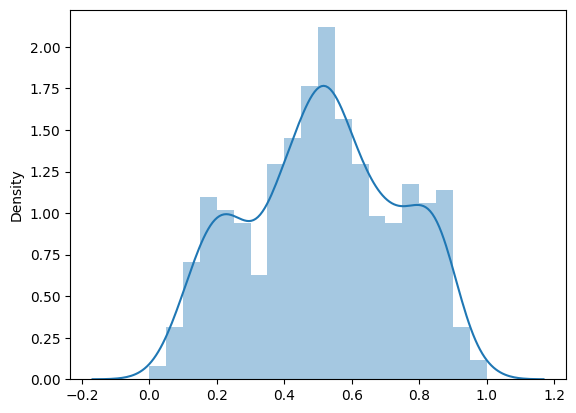

In [76]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [77]:
df_test[var]=scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0.692706,False,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0.712034,False,...,False,False,False,False,False,False,False,True,False,False
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0.303382,False,...,True,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0.547400,False,...,False,False,False,False,False,False,False,True,False,False
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0.569029,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,0.336516,True,...,False,False,False,False,True,False,False,False,True,False
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0.757478,False,...,False,False,False,False,False,False,True,False,False,False
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0.495973,False,...,False,False,False,False,True,False,False,False,False,False
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0.868615,False,...,True,False,False,False,False,False,False,True,True,False


In [88]:
y_test=df_test.pop('cnt')
x_test=df_test.drop(["casual","registered"],axis=1)

In [79]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,False,False,False,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.610133,0.153728,0.712034,False,True,False,...,False,False,False,False,False,False,False,True,False,False
299,0,0,1,0.511964,0.837699,0.334206,0.303382,False,False,True,...,True,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,0.547400,False,False,False,...,False,False,False,False,False,False,False,True,False,False
152,0,0,1,0.817246,0.314298,0.537414,0.569029,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [80]:
c=x_train_rfe2.drop('const',axis=1)

In [81]:
c

,workingday,cnt,mnth_Feb,mnth_Jul,mnth_Mar,weekday_Sun,weathersit_C
653,1.0,0.864243,0.0,0.0,0.0,0.0,0.0
576,1.0,0.827658,0.0,1.0,0.0,0.0,0.0
426,0.0,0.465255,0.0,0.0,1.0,0.0,0.0
728,0.0,0.204096,0.0,0.0,0.0,1.0,0.0
482,0.0,0.482973,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
526,1.0,0.764151,0.0,0.0,0.0,0.0,0.0
578,1.0,0.832835,0.0,0.0,0.0,0.0,0.0
53,1.0,0.218017,1.0,0.0,0.0,0.0,0.0
350,0.0,0.312586,0.0,0.0,0.0,0.0,0.0


In [82]:
col2=c.columns

In [83]:
existing_columns = [col for col in col2 if col in x_test.columns]

# If any columns are missing, print a warning
missing_columns = [col for col in col2 if col not in x_test.columns]

# Select the existing columns from x_test
x_test_rfe2 = x_test[existing_columns]

In [84]:
x_test_rfe2 = sm.add_constant(x_test_rfe2)

In [85]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   workingday    219 non-null    int64  
 2   cnt           219 non-null    float64
 3   mnth_Feb      219 non-null    bool   
 4   mnth_Jul      219 non-null    bool   
 5   mnth_Mar      219 non-null    bool   
 6   weekday_Sun   219 non-null    bool   
 7   weathersit_C  219 non-null    bool   
dtypes: bool(5), float64(2), int64(1)
memory usage: 7.9 KB


In [89]:
# Identify the exact columns used to train the model
train_columns = lm2.model.exog_names

# Align the test data columns with the training data columns
x_test_rfe2_aligned = x_test_rfe2.reindex(columns=train_columns, fill_value=0)

# Predict using the aligned test data
y_pred = lm2.predict(x_test_rfe2_aligned)

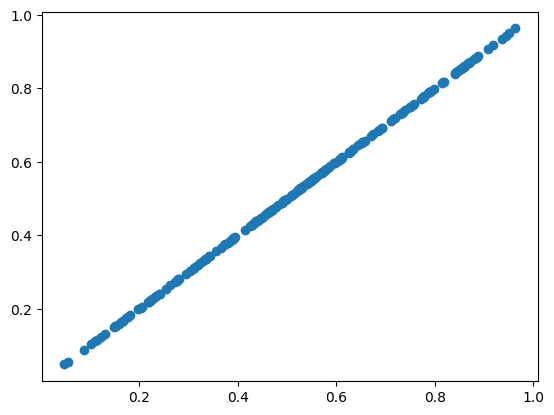

In [90]:
plt.figure()
plt.scatter(y_test,y_pred)

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

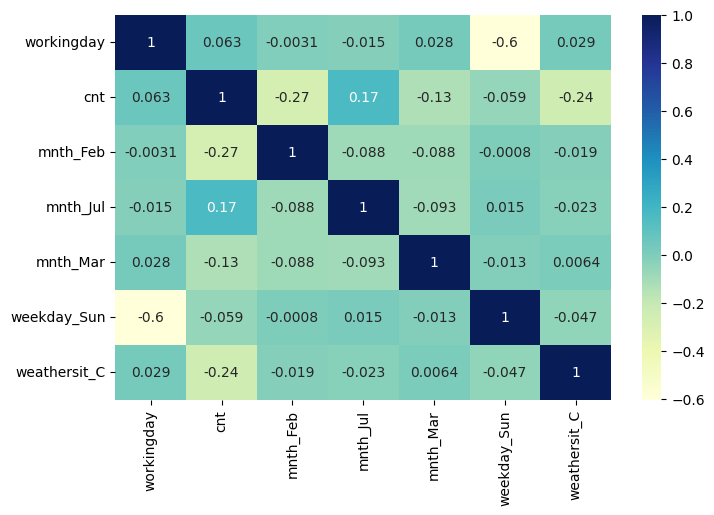

In [98]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(), cmap='YlGnBu', annot=True)
plt.show()